# LetsGrowMore (LGMVIP) - May 2022

## A.GOWTHAMI - Data Science Intern

## INTERMEDIATE LEVEL TASK

## Task 6 - Prediction using Decision Tree Algorithm

Create the Decision Tree classifier and visualize it graphically. 
The purpose is if we feed any new data to this classifier, it would be able to  predict the right class accordingly.  

DATASET LINK : https://bit.ly/3kXTdox

### 1. IMPORTING THE NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from matplotlib.pyplot import rcParams
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### 2. IMPORTING THE DATASET

In [2]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### 3. EXPLORATORY DATA ANALYSIS (EDA)

In [3]:
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
iris.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 4. VISUALISATION

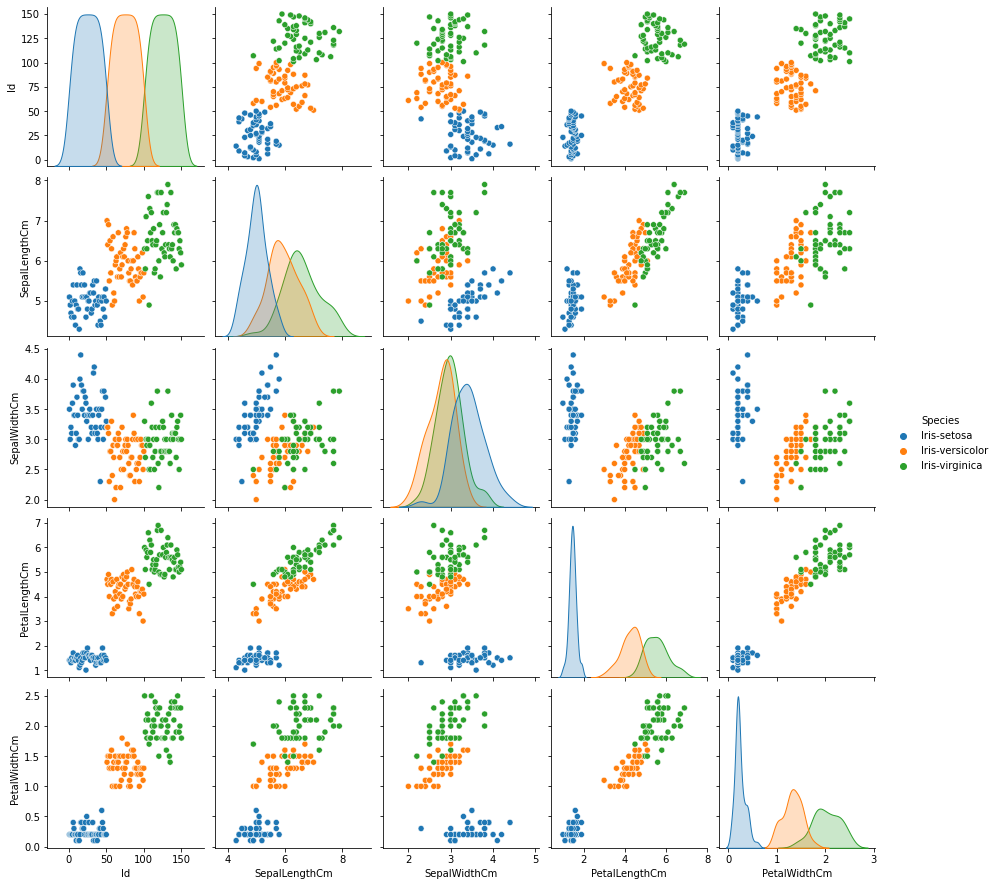

In [9]:
sns.pairplot(iris,hue="Species")

<AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

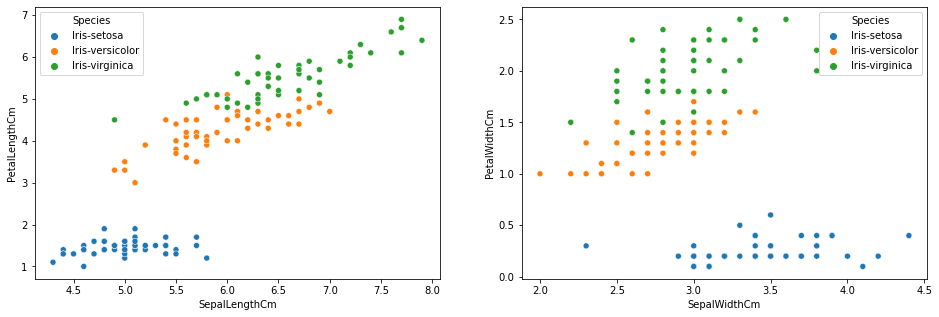

In [10]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x = 'SepalLengthCm', y = 'PetalLengthCm',data = iris,hue='Species',ax=ax1)
sns.scatterplot(x = 'SepalWidthCm', y = 'PetalWidthCm',data = iris,hue='Species',ax=ax2)

<AxesSubplot:ylabel='PetalWidthCm'>

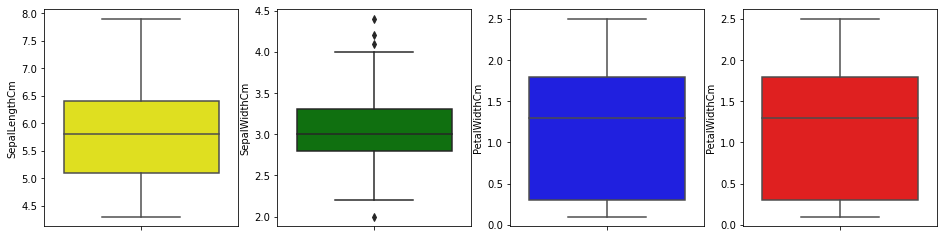

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=iris,y='SepalLengthCm',color = 'yellow')
plt.subplot(1,4,2)
sns.boxplot(data=iris,y='SepalWidthCm',color='green')
plt.subplot(1,4,3)
sns.boxplot(data=iris,y='PetalWidthCm',color='blue')
plt.subplot(1,4,4)
sns.boxplot(data=iris,y='PetalWidthCm',color='red')

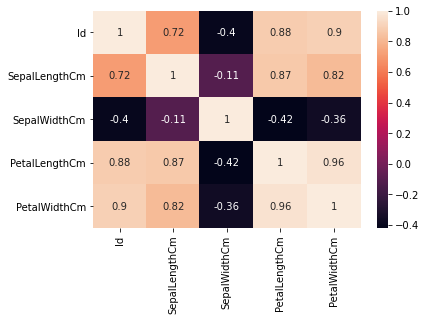

In [12]:
sns.heatmap(iris.corr(), annot=True)
plt.show()

### 5. DATA PREPROCESSING

In [13]:
iris_sep = iris.values

In [14]:
x = iris_sep[:,1:5]
y = iris_sep[:,5]

In [15]:
x.shape,y.shape

((150, 4), (150,))

### 6. BUILDING MACHINE LEARNING MODEL

#### TRAIN TEST SPLIT

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [17]:
X_train.shape,X_test.shape

((120, 4), (30, 4))

In [18]:
y_train.shape,y_test.shape

((120,), (30,))

### DECISION TREE ALGORITHM

In [19]:
decision = DecisionTreeClassifier(criterion='entropy')

In [20]:
decision.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [21]:
y_pred_train = decision.predict(X_train)
y_pred_test = decision.predict(X_test)

#### SUMMARY

In [22]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.79      1.00      0.88        11
 Iris-virginica       1.00      0.70      0.82        10

       accuracy                           0.90        30
      macro avg       0.93      0.90      0.90        30
   weighted avg       0.92      0.90      0.90        30

[[ 9  0  0]
 [ 0 11  0]
 [ 0  3  7]]


#### ACCURACY

In [23]:
print('accuracy is',accuracy_score(y_pred_test,y_test))

accuracy is 0.9


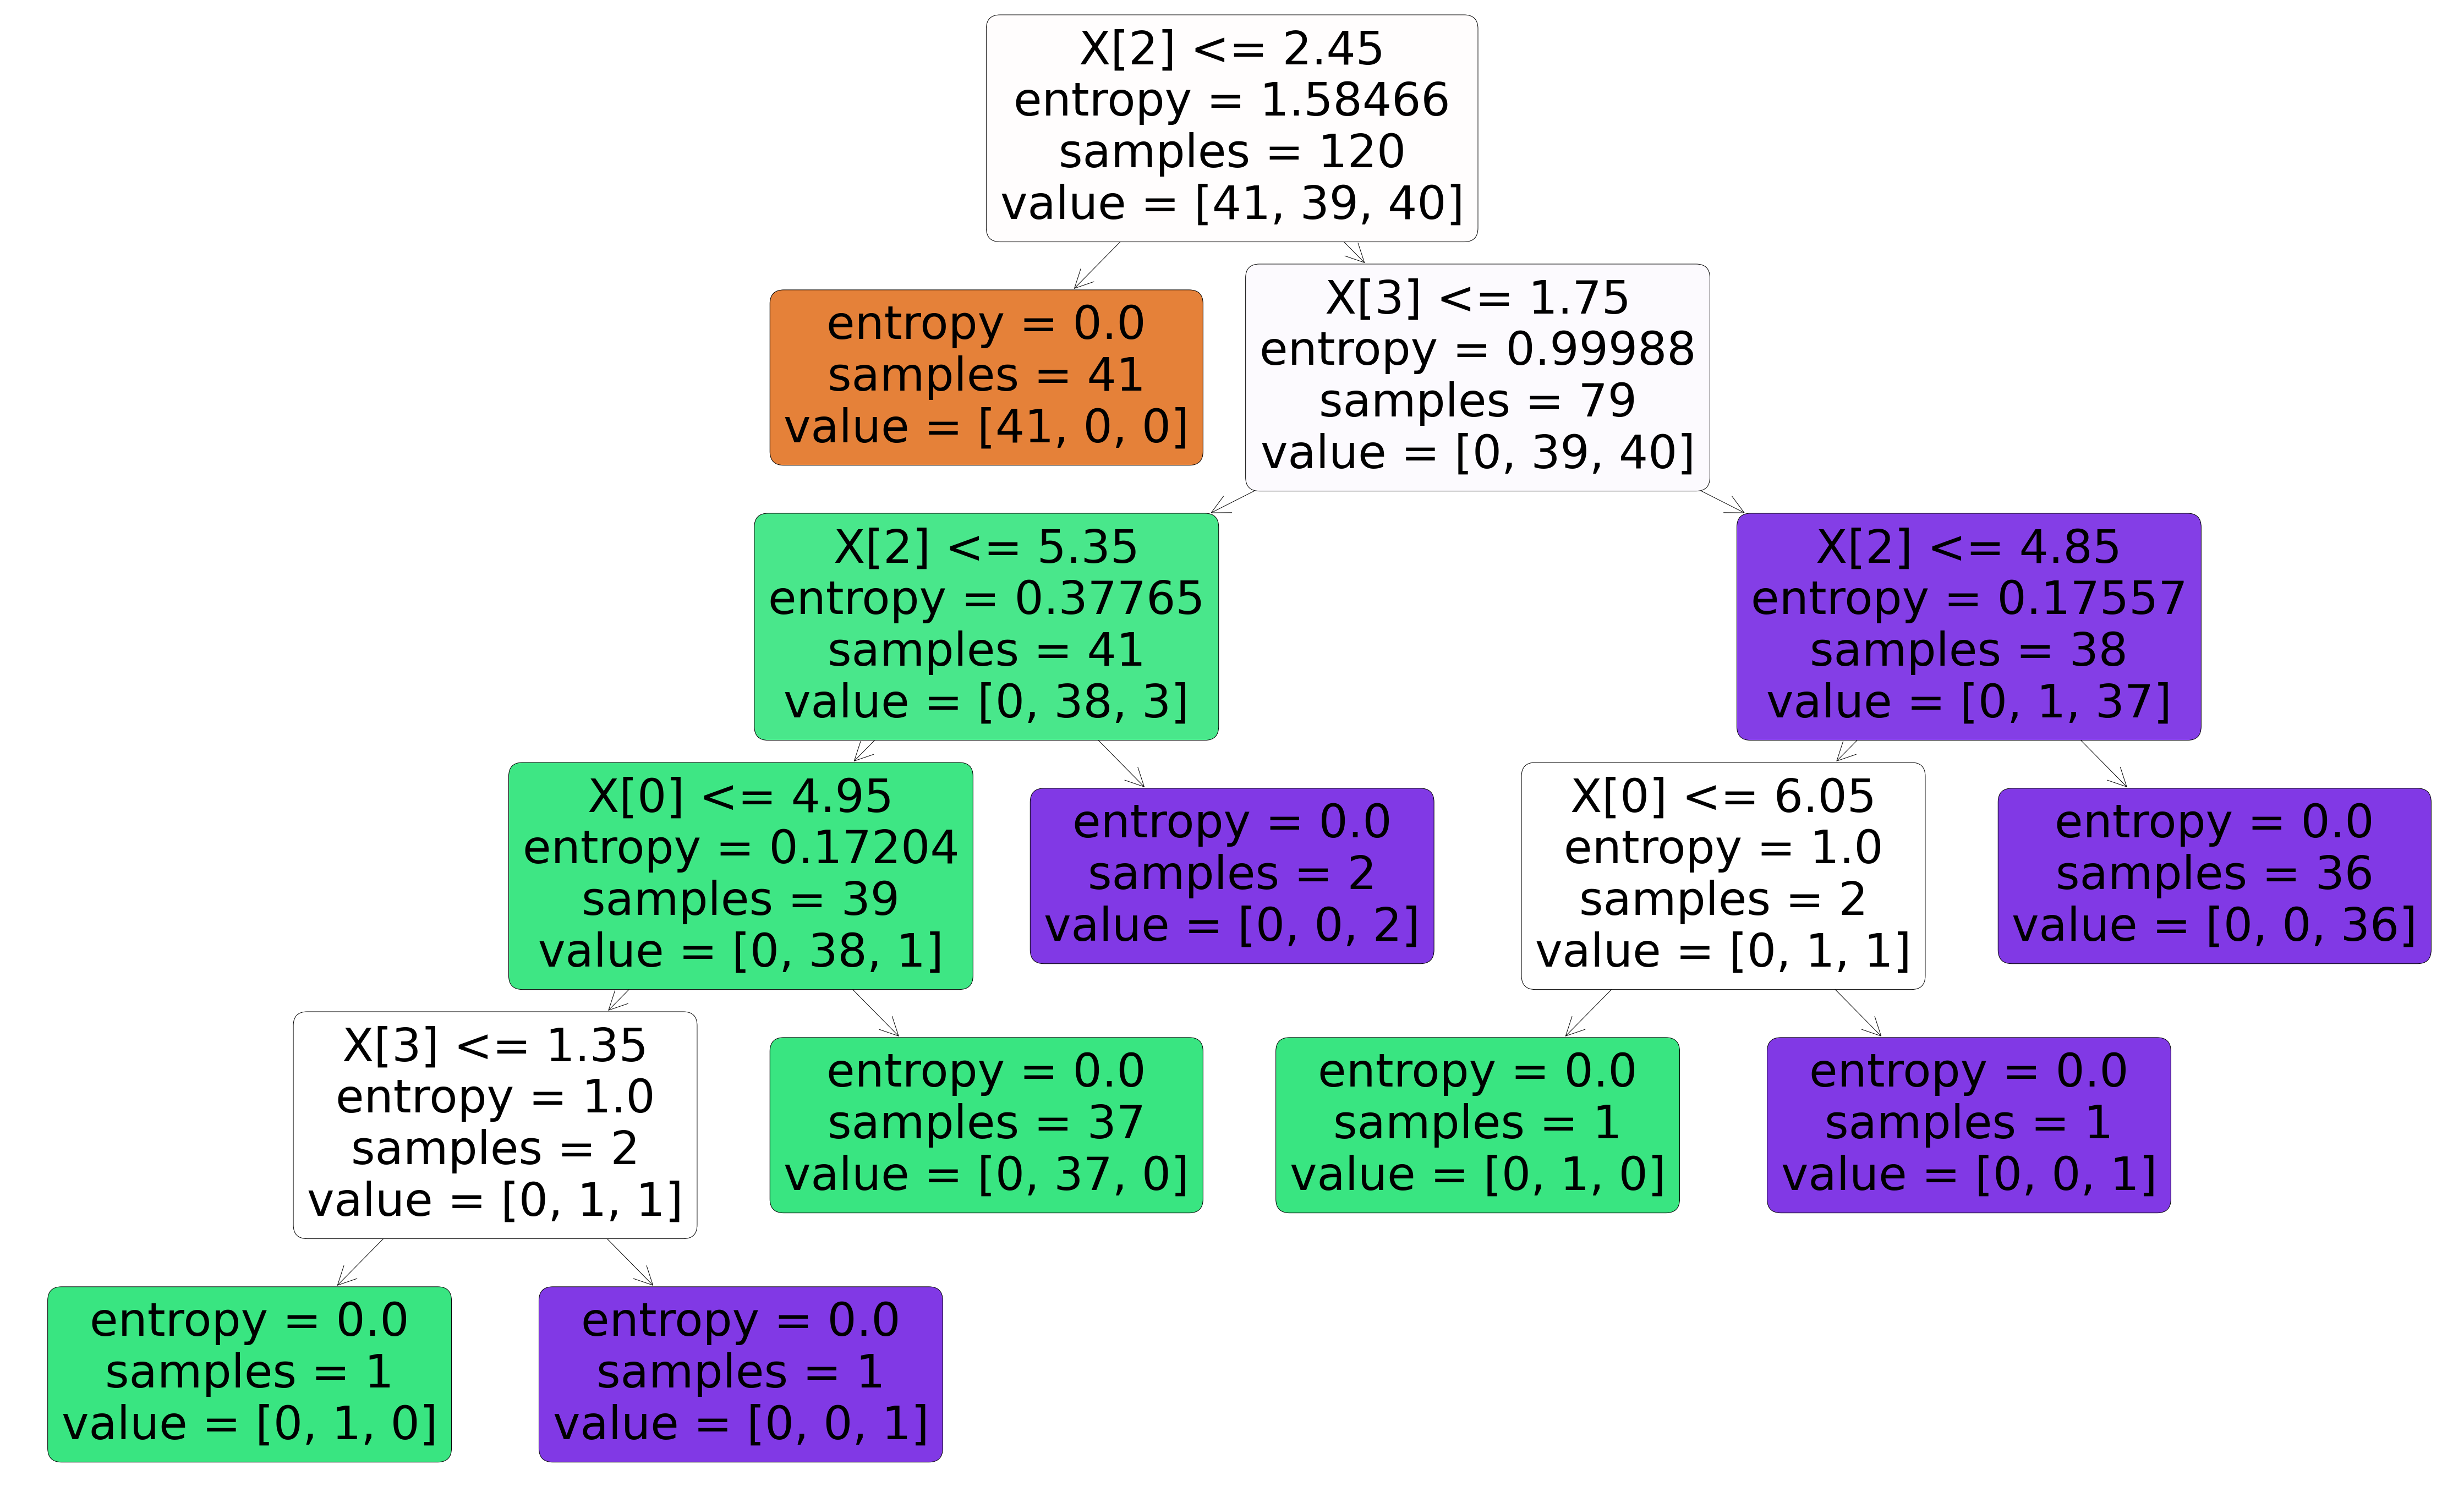

In [24]:
rcParams['figure.figsize'] = 80, 50
plot_tree(decision,precision=5,rounded=True,filled=True);

In [25]:
#Decision making in decision tree

text_representation = tree.export_text(decision)

print(text_representation)

NameError: name 'tree' is not defined